In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("../../data/custom_features.csv")
df

,TENURE,CREDIT_UTILIZATION,TOTAL_TRX,TOTAL_PURCHASE_FREQUENCY,AVG_PAYMENT,HIGH_CREDIT_UTILIZER,FULL_PAYMENT_FLAG,BALANCE_PER_MONTH,PURCHASES_PER_MONTH,PAYMENTS_PER_MONTH
0,12,0.040901,2,0.250000,16.816840,0,0,3.408396,7.950000,16.816840
1,12,0.457495,4,0.000000,341.919383,0,0,266.872285,0.000000,341.919383
2,12,0.332687,12,2.000000,51.838895,0,0,207.929072,64.430833,51.838895
3,12,0.222223,2,0.166666,0.000000,0,0,138.889212,124.916667,0.000000
4,12,0.681429,1,0.166666,56.527897,0,0,68.142861,1.333333,56.527897
...,...,...,...,...,...,...,...,...,...,...
8945,6,0.028494,6,1.833333,54.265744,0,0,4.748920,48.520000,54.265744
8946,6,0.019183,6,1.833333,45.976887,0,0,3.197202,50.000000,45.976887
8947,6,0.023399,5,1.500000,13.545129,0,0,3.899779,24.066667,13.545129
8948,6,0.026915,2,0.000000,8.758327,0,0,2.242927,0.000000,8.758327


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [50]:
df_scaled

,TENURE,CREDIT_UTILIZATION,TOTAL_TRX,TOTAL_PURCHASE_FREQUENCY,AVG_PAYMENT,HIGH_CREDIT_UTILIZER,FULL_PAYMENT_FLAG,BALANCE_PER_MONTH,PURCHASES_PER_MONTH,PAYMENTS_PER_MONTH
0,0.360680,-0.892951,-0.629857,-0.882297,-0.533804,-0.547656,-0.240145,-0.731398,-0.433384,-0.533804
1,0.360680,0.176063,-0.550921,-1.155540,0.779913,-0.547656,-0.240145,0.717474,-0.477428,0.779913
2,0.360680,-0.144206,-0.235177,1.030404,-0.392283,-0.547656,-0.240145,0.393326,-0.120468,-0.392283
3,0.360680,-0.427665,-0.629857,-0.973378,-0.601760,-0.547656,-0.240145,0.013654,0.214636,-0.601760
4,0.360680,0.750693,-0.669325,-0.973378,-0.373335,-0.547656,-0.240145,-0.375403,-0.470041,-0.373335
...,...,...,...,...,...,...,...,...,...,...
8945,-4.122768,-0.924789,-0.471985,0.848242,-0.382476,-0.547656,-0.240145,-0.724026,-0.208617,-0.382476
8946,-4.122768,-0.948680,-0.471985,0.848242,-0.415971,-0.547656,-0.240145,-0.732560,-0.200418,-0.415971
8947,-4.122768,-0.937863,-0.511453,0.483918,-0.547025,-0.547656,-0.240145,-0.728696,-0.344094,-0.547025
8948,-4.122768,-0.928839,-0.629857,-1.155540,-0.566368,-0.547656,-0.240145,-0.737808,-0.477428,-0.566368


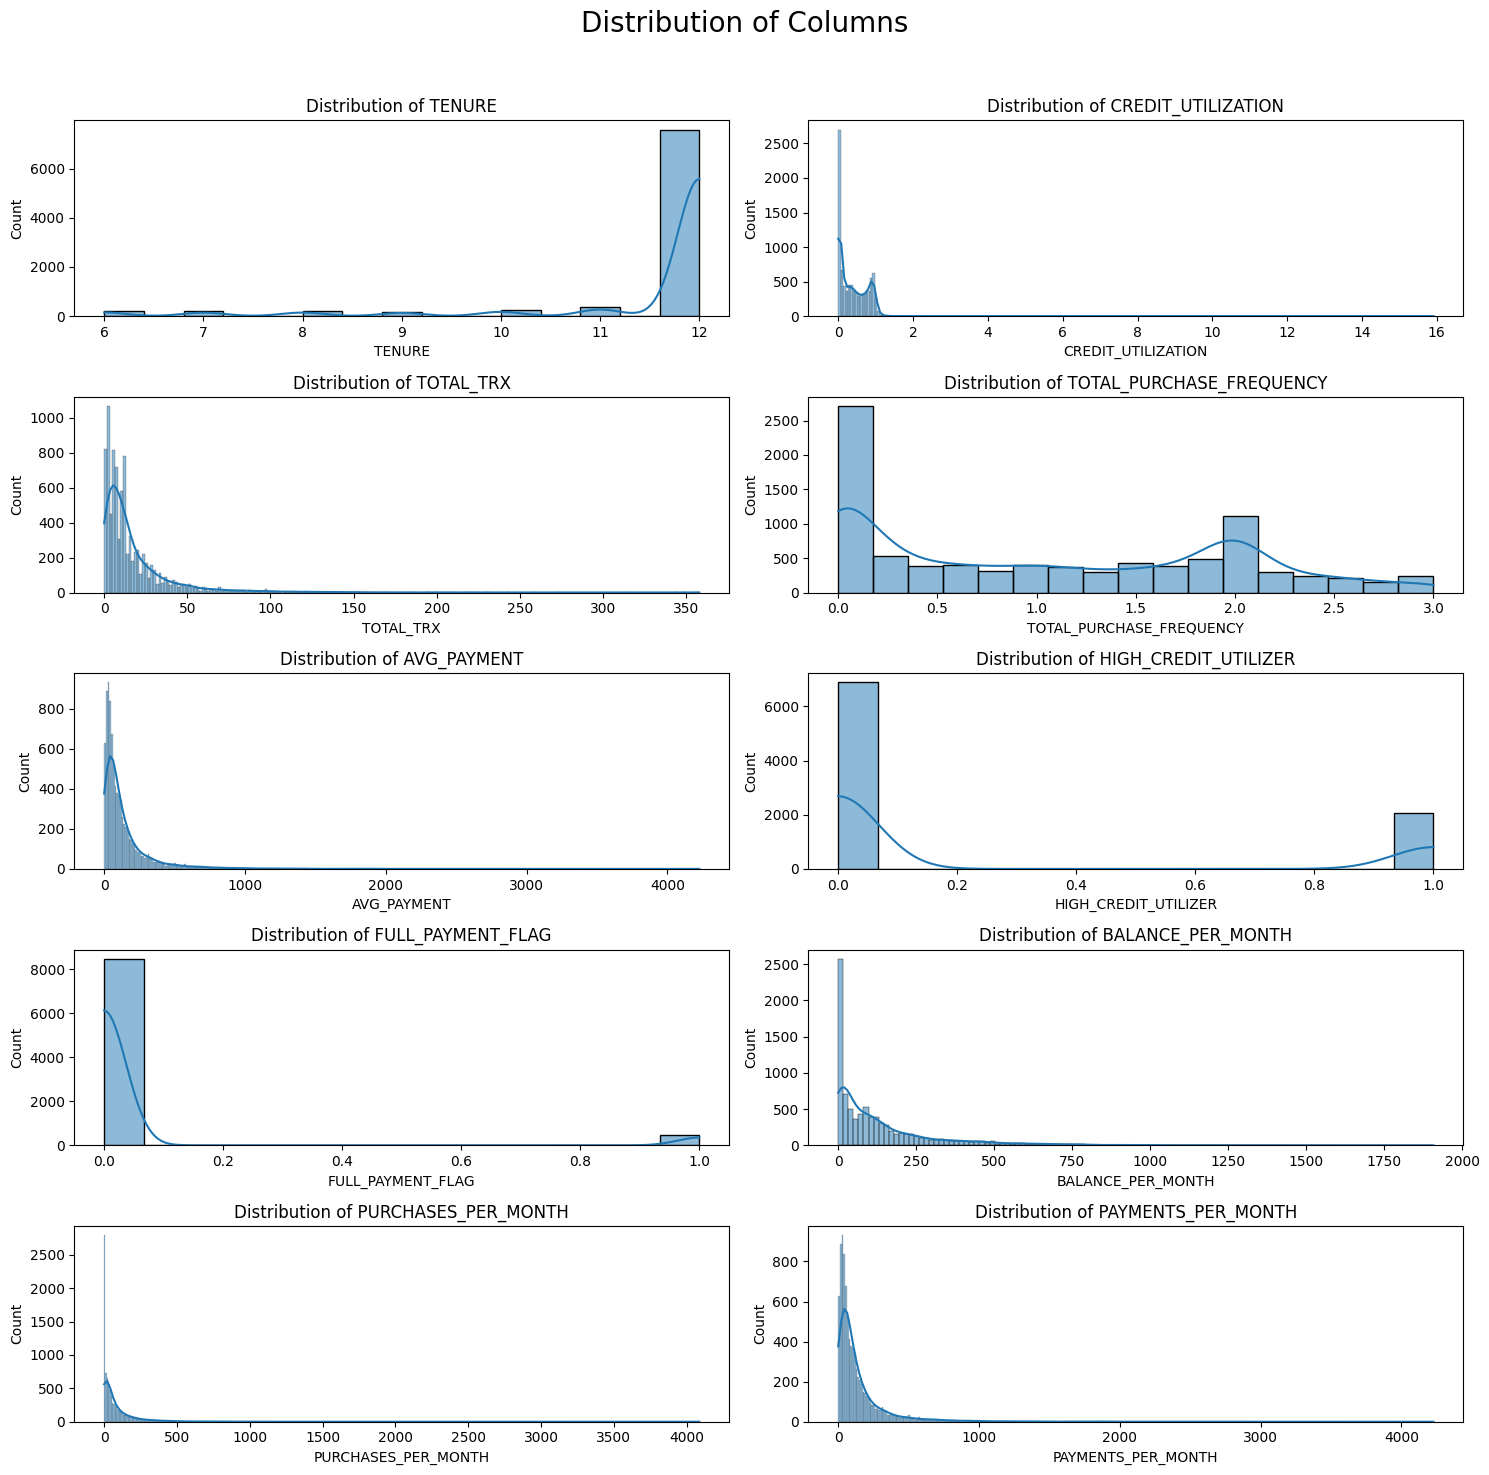

In [52]:
fig, axes = plt.subplots(5, 2, figsize=(15, 15))  
fig.suptitle('Distribution of Columns', fontsize=20)



for i, col in enumerate(df_scaled.columns):
    ax = axes[i//2, i%2] 
    sns.histplot(df[col], kde=True, ax=ax) 
    ax.set_title(f'Distribution of {col}', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


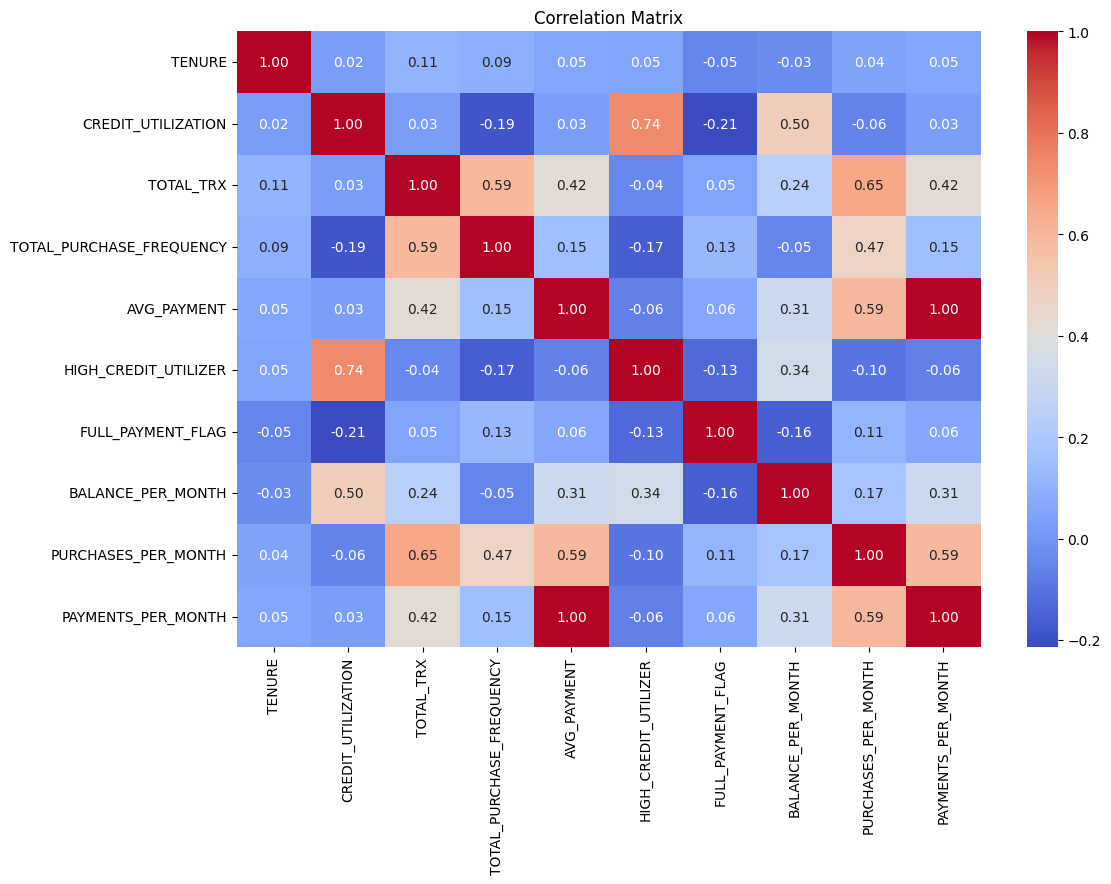

In [53]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [15]:
df.drop(["AVG_PAYMENT"], axis=1, inplace=True)

KeyError: "['AVG_PAYMENT'] not found in axis"

In [16]:
df.to_csv("../../data/custom_features2.csv", index=False)

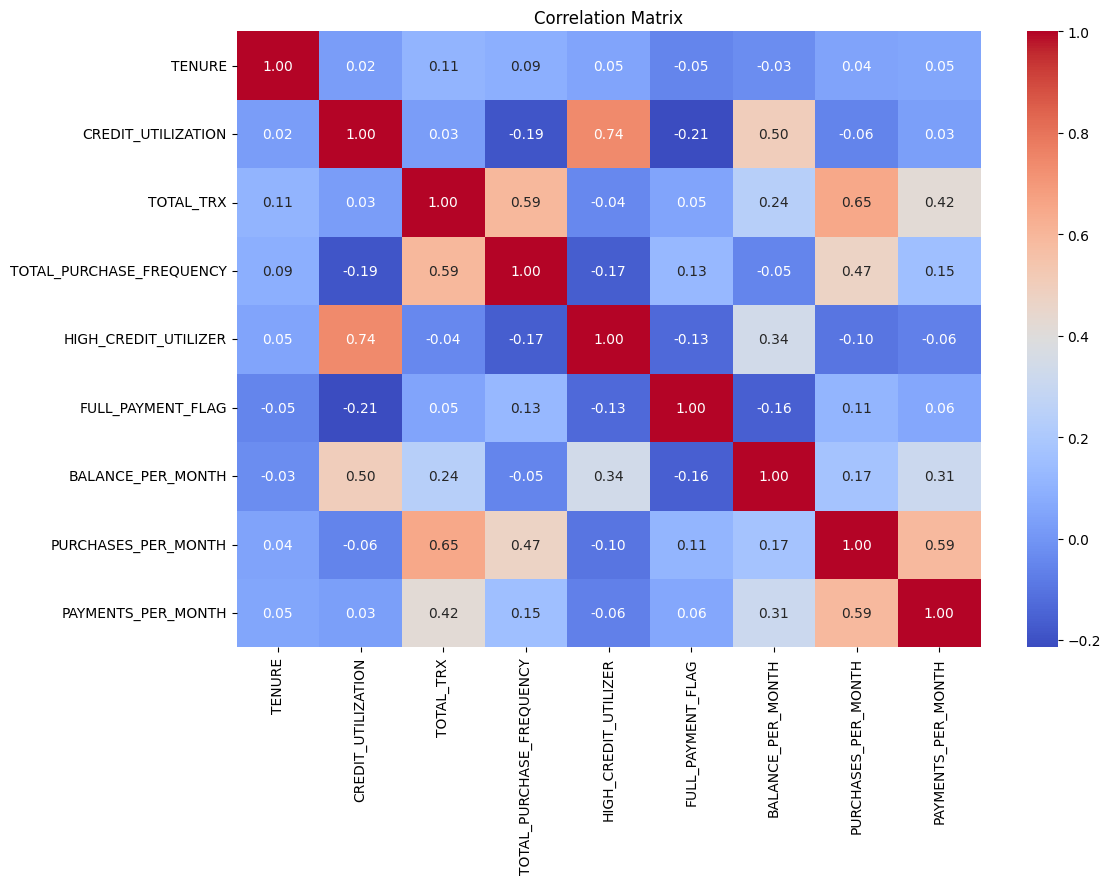

In [56]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
df_og = pd.read_csv("../../data/dataset_cleaned.csv")
df_og.drop(["TENURE"], axis=1, inplace=True)
df_og.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


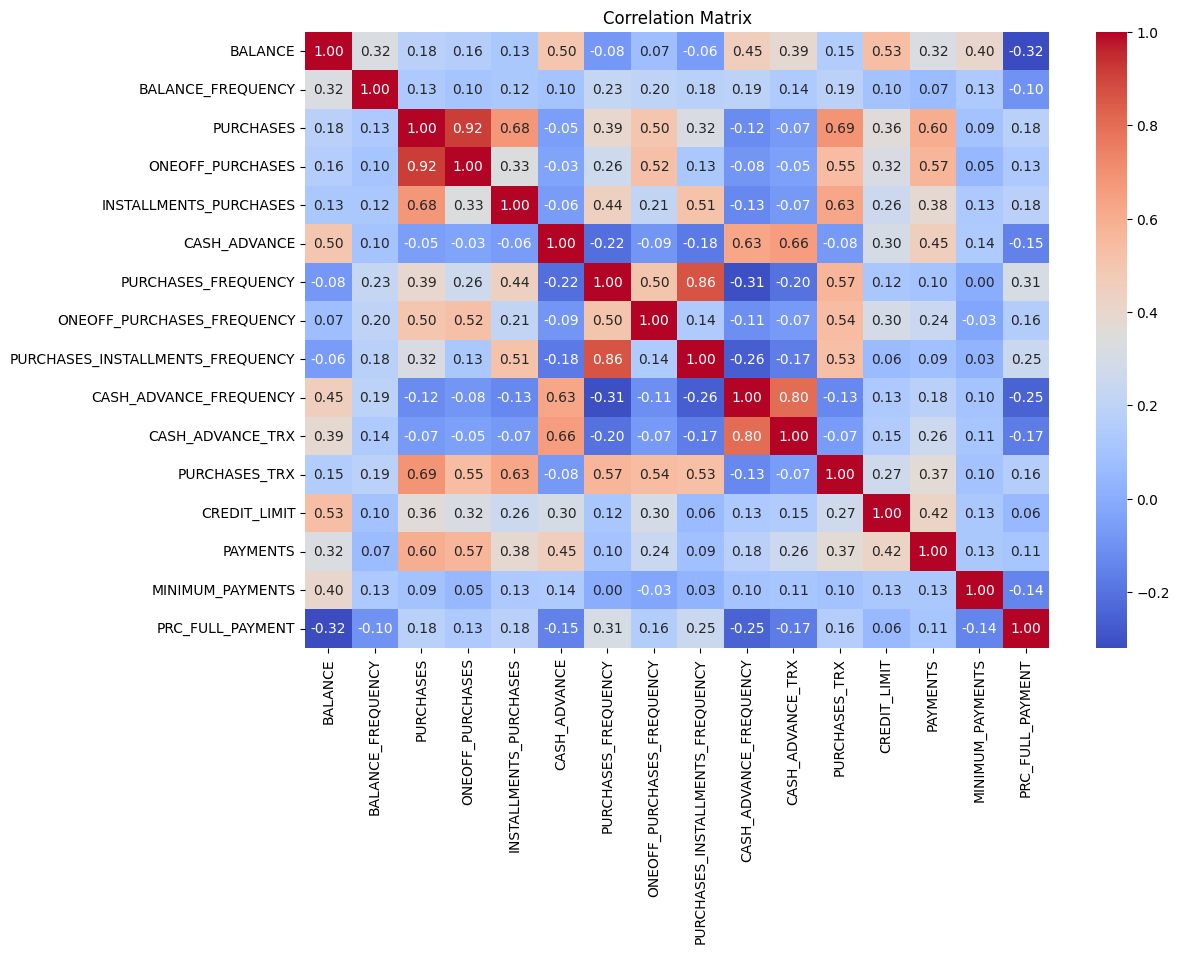

In [66]:
correlation_matrix = df_og.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [19]:
df_cus_og = pd.concat([df_og, df],axis=1)
df_cus_og.to_csv("../../data/custom_and_og.csv")
df_cus_og

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,CREDIT_UTILIZATION,TOTAL_TRX,TOTAL_PURCHASE_FREQUENCY,HIGH_CREDIT_UTILIZER,FULL_PAYMENT_FLAG,BALANCE_PER_MONTH,PURCHASES_PER_MONTH,PAYMENTS_PER_MONTH
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,0.040901,2,0.250000,0,0,3.408396,7.950000,16.816840
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,0.457495,4,0.000000,0,0,266.872285,0.000000,341.919383
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,0.332687,12,2.000000,0,0,207.929072,64.430833,51.838895
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,0.222223,2,0.166666,0,0,138.889212,124.916667,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,0.681429,1,0.166666,0,0,68.142861,1.333333,56.527897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.500000,6,0.028494,6,1.833333,0,0,4.748920,48.520000,54.265744
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,0.000000,6,0.019183,6,1.833333,0,0,3.197202,50.000000,45.976887
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,0.250000,6,0.023399,5,1.500000,0,0,3.899779,24.066667,13.545129
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.250000,6,0.026915,2,0.000000,0,0,2.242927,0.000000,8.758327
